<a href="https://colab.research.google.com/github/Arimoro2020/Predicting-the-Churn-of-Telecom-Users/blob/main/04_Model_Building_with_Tensorflow_Keras_Neural_Network_Telecom_Users_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Drive**

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


**Load data & Check first five rows**

In [31]:
telecom_df_new = pd.read_excel('/content/drive/MyDrive/PTDataScience/Project2/01_DataCleansing_Telecom_Churn.xlsx')
telecom_df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


**Set CoustomerID as new Index**

In [32]:
telecom_df_new.set_index('customerID', inplace=True)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


**Convert nominal categorical variables to dummy variables**

In [33]:
Gender = pd.get_dummies(telecom_df_new['gender'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, Gender], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1


In [34]:
senior = pd.get_dummies(telecom_df_new['SeniorCitizen'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, senior], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1
customerID,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0


In [35]:
partner = pd.get_dummies(telecom_df_new['Partner'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, partner], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0


In [36]:
dependents = pd.get_dummies(telecom_df_new['Dependents'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, dependents], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0


In [37]:
phone = pd.get_dummies(telecom_df_new['PhoneService'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, phone], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1


In [38]:
lines = pd.get_dummies(telecom_df_new['MultipleLines'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, lines], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0


In [39]:
internet = pd.get_dummies(telecom_df_new['InternetService'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, internet], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0


In [40]:
security = pd.get_dummies(telecom_df_new['OnlineSecurity'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, security], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1


In [41]:
backup = pd.get_dummies(telecom_df_new['OnlineBackup'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, backup], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0


In [42]:
protection = pd.get_dummies(telecom_df_new['DeviceProtection'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, protection], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [43]:
support = pd.get_dummies(telecom_df_new['TechSupport'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, support], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [44]:
tv = pd.get_dummies(telecom_df_new['StreamingTV'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, tv], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [45]:
movies = pd.get_dummies(telecom_df_new['StreamingMovies'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, movies], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [46]:
paperless = pd.get_dummies(telecom_df_new['PaperlessBilling'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, paperless], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [47]:
payment = pd.get_dummies(telecom_df_new['PaymentMethod'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, payment], axis=1)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**Map ordinal values to the Contract feature & Target**

In [48]:
telecom_df_new['Contract'] = telecom_df_new['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,Credit card (automatic),24.10,1734.65,No,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,1,Yes,Credit card (automatic),88.15,3973.20,No,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,1,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,1,Yes,Electronic check,55.90,238.50,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Electronic check,53.45,119.50,No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [49]:
telecom_df_new['Churn'] = telecom_df_new['Churn'].map({'Yes': 1, 'No': 0})
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,Credit card (automatic),24.10,1734.65,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,1,Yes,Credit card (automatic),88.15,3973.20,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,1,Yes,Bank transfer (automatic),74.95,2869.85,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,1,Yes,Electronic check,55.90,238.50,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Electronic check,53.45,119.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**Create features variable and Target variable**

In [50]:
X = telecom_df_new.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn'], axis=1).values
X.shape

(5960, 29)

In [51]:
y = telecom_df_new['Churn'].values
y.shape

(5960,)

**Split data into training and testing data**




In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

**Standardize X_train and X_test data**

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Define Network Structure, Compile Model & Fit Model**

In [54]:

input_shape = X_train.shape[1]
input_shape

29

In [55]:
model = Sequential()
model.add(Dense(29,input_dim = input_shape, activation='relu')) 
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'bce', optimizer='adam', metrics=['accuracy'])
callback = EarlyStopping(patience=0)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=2, epochs=100, callbacks=[callback])

Epoch 1/100
131/131 - 1s - loss: 0.5324 - accuracy: 0.7229 - val_loss: 0.4615 - val_accuracy: 0.7573
Epoch 2/100
131/131 - 0s - loss: 0.4362 - accuracy: 0.7987 - val_loss: 0.4462 - val_accuracy: 0.7718
Epoch 3/100
131/131 - 0s - loss: 0.4226 - accuracy: 0.8058 - val_loss: 0.4424 - val_accuracy: 0.7757
Epoch 4/100
131/131 - 0s - loss: 0.4157 - accuracy: 0.8092 - val_loss: 0.4418 - val_accuracy: 0.7808
Epoch 5/100
131/131 - 0s - loss: 0.4105 - accuracy: 0.8130 - val_loss: 0.4407 - val_accuracy: 0.7813
Epoch 6/100
131/131 - 0s - loss: 0.4069 - accuracy: 0.8138 - val_loss: 0.4405 - val_accuracy: 0.7852
Epoch 7/100
131/131 - 0s - loss: 0.4033 - accuracy: 0.8178 - val_loss: 0.4397 - val_accuracy: 0.7847
Epoch 8/100
131/131 - 0s - loss: 0.4009 - accuracy: 0.8202 - val_loss: 0.4394 - val_accuracy: 0.7813
Epoch 9/100
131/131 - 0s - loss: 0.3991 - accuracy: 0.8164 - val_loss: 0.4393 - val_accuracy: 0.7819
Epoch 10/100
131/131 - 0s - loss: 0.3960 - accuracy: 0.8221 - val_loss: 0.4409 - val_accura

**Visualize Loss**

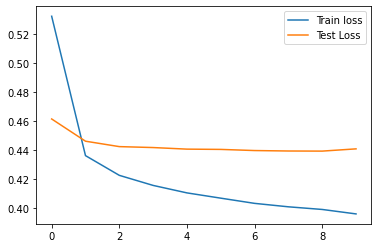

In [56]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();